## <span style="color: blue">Name :-</span>   <span style="color: green;"> <font size = "5">PRASHANT ARYA</font></span>
## <span style="color: blue">Batch :-</span>   <span style="color: maroon;"> <font size = "5">WS103787</font></span>

# <span style="color: blue">Title of the project :-</span> "" <span style="color: red;"><font size = "6">BANK MARKETING</font></span> ""

# <span style="color: blue">Description of the project :-</span>

* <font size = "3"><span style="color: green">***Sources created by :-***</span></font>
  **Paulo Cortez** (Univ. Minho) and **Sérgio Moro** (ISCTE-IUL) @ **2012**

* <font size = "3"><span style="color: green">***Past Usage :-***</span></font>
  The full dataset was described and analyzed by **S. Moro, R. Laureano** and **P. Cortez** using **Data Mining** for ***Bank   Direct Marketing*** : An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, *Guimarães, Portugal*, October, 2011. EUROSIS.

* <font size = "3"><span style="color: green">***Relevant Information :-***</span></font>
  The data is related with direct marketing campaigns of a *Portuguese* banking institution. The marketing campaigns were based on  phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term **deposit**) would be (or not) subscribed. 

  There are two datasets :-
  
     1) <span style="color: blue">bank-full.csv</span> with all examples, ordered by date (from May 2008 to November 2010).
  
     2) <span style="color: blue">bank.csv</span> with 10% of the examples (4521), randomly selected from bank-full.csv. 
     The smallest dataset is provided to test more computationally   demanding **machine learning algorithms** (e.g. **SVM**).

#  <span style="color: blue">Objective of the project :-</span> 
   <font size = "4">To predict if the *client* will **subscribe** a term **deposit** (variable **y**).</font>

* * *

## Importing all important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

***

# <span style = "color : blue">Data Loading</span>

In [4]:
# Reading the dataset and loading it into "bank_client" variable
bank_client = pd.read_csv(r"C:\Users\Dell\Documents\DS\home\bank (1).csv")

# Displaying first 5 rows of dataset
bank_client.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# Returning the shape i.e. no. of rows and no. of columns in the dataset.
bank_client.shape

(11162, 17)

* <font size = "3">There are **11162 rows** and **17 columns**(**features**).</font>

***

# <span style = "color : blue">Data Preprocessing</span>

In [6]:
# Checking null values in the dataset
bank_client.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* <font size = "3">From above, it can be clearly seen that there are **no null values** in the dataset.</font> 

In [7]:
# Checking datatypes of every features of the dataset
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


* <font size = "3">The ***numerical*** features are : **{'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'}**.<br>
     The ***categorical*** features are : **{'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 
    'poutcome', 'deposit'}**.</font>

In [8]:
# Checking the min, max, 25th percentile, 50th percentile, 75th percentile values of all numerical columns.
bank_client.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


* <font size = "3">From above, it can be seen that in the <span style="color: blue">"***balance***"</span> column, there is huge variation between **25th** percentile value and **minimum** value and also between **75th** percentile and **maximum** value. <br> In <span style="color: blue">"***duration", "campaign", "pdays", "previous***"</span> columns, there is huge variation between **75th** percentile and **maximum** value. 
<br> Hence, there is high chance of **outliers** in these columns.</font>

***

# <span style = "color : blue">Data Visualization</span>

* <font size = "3">In this step, some **visualizations** will be done on various features of the dataset.</font>

## 1) Age Feature

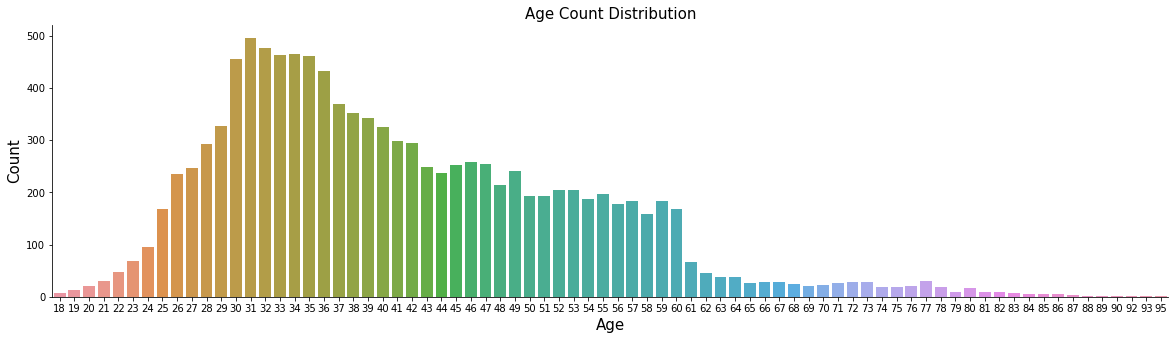

In [9]:
# Count plot of "age" feature.

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'age', data = bank_client)          # Function for plotting the Count plot
ax.set_xlabel('Age', fontsize=15)                     # Setting X-axis as "Age"  
ax.set_ylabel('Count', fontsize=15)                   # Setting Y-axis as "Count"
ax.set_title('Age Count Distribution', fontsize=15)   # Naming the title as "Age Count Distribution"
sns.despine()                                         # Remove the top and right spines from the plot.

* <font size = "3">From the above <span style = "color : green">***count plot***</span>, that **highest** number of people belong to the range of age between **30** to **36**, where the maximum number of people is of age **31**. 
<br> There are very few people of age beyond **80**.</font>

* <font size = "3">**Note** :- Generally, <span style = "color : green">***count plot***</span> for the **numeric** feature is not preferrable but "**age**" feature was **integer** type so it's ok to plot the <span style = "color : green">***count plot***</span> for it but if any feature is of **float** type then <span style = "color : green">***count plot***</span> should be **prohibited**.</font>  

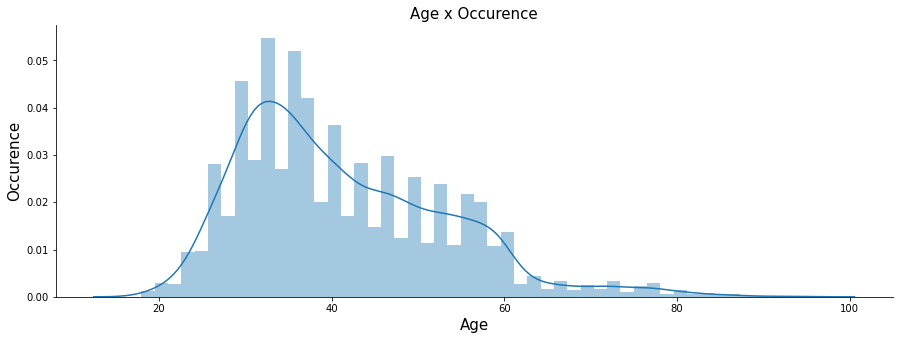

In [10]:
# Distribution plot of "age" feature.

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)                     # Setting size of the figure
sns.distplot(bank_client['age'])               # Function for plotting the Distribution plot
ax.set_xlabel('Age', fontsize=15)              # Setting X-axis as "Age"  
ax.set_ylabel('Occurence', fontsize=15)        # Setting Y-axis as "Occurence"
ax.set_title('Age x Occurence', fontsize=15)   # Naming the title as "Age x Occurence"
sns.despine() 

* <font size = "3">From the above <span style = "color : green">***distribution plot***</span>, it can be clearly seen that the **maxima** of the **kde** is when the **age** is very near to **30**. <br> The curve is sharply **decreasing** after it crosses **age** >= **60**.</font>

## 2) Job Feature

In [11]:
# Categories of "job" feature
bank_client['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

* <font size = "3"> The **frequency** of each category of the <span style = "color : blue">"**job**"</span> feature is going to be checked.</font>

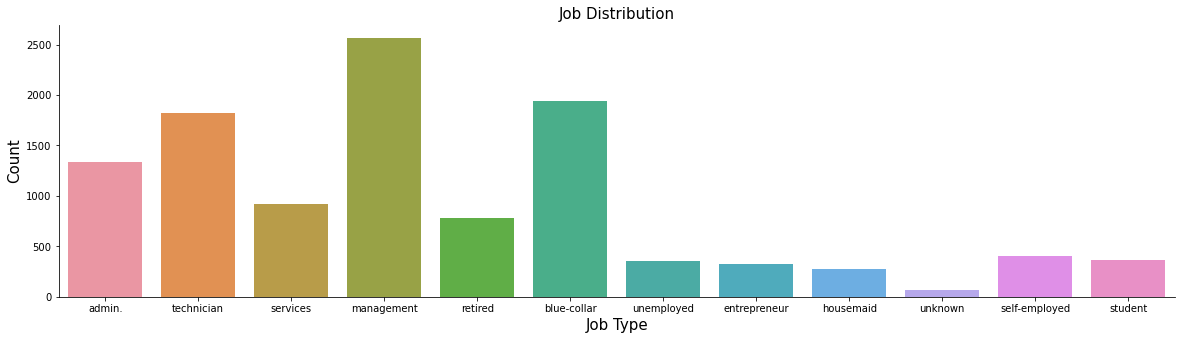

In [12]:
# Count plot of "job" feature.

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'job', data = bank_client)      # Function for plotting the Count plot
ax.set_xlabel('Job Type', fontsize=15)            # Setting X-axis as "Job Type"  
ax.set_ylabel('Count', fontsize=15)               # Setting Y-axis as "Count"
ax.set_title('Job Distribution', fontsize=15)     # Naming the title as "Job Distribution"
sns.despine()                                     # Remove the top and right spines from the plot.

* <font size = "3">From the above <span style = "color : green">***Count plot***</span>, it is clearly seen that most of the **clients** are in <span style = "color : blue">**management**</span> field while least number of **clients** are **unknown**.</font> 

## 3) Marital Feature

In [13]:
# Categories of "marital" feature.
bank_client['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

* <font size = "3"> The **frequency** of each category of the <span style = "color : blue">"**marital**"</span> feature is going to be checked.</font>

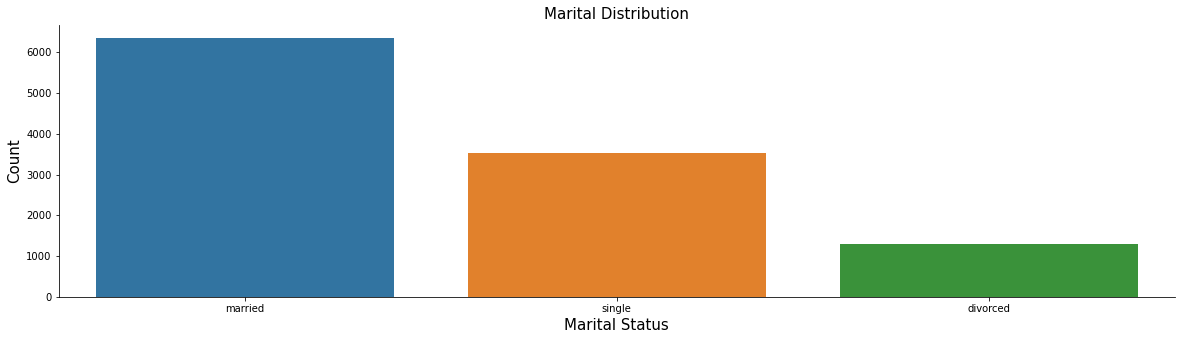

In [14]:
# Count plot of "marital" feature.

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'marital', data = bank_client)  # Function for plotting the Count plot
ax.set_xlabel('Marital Status', fontsize=15)      # Setting X-axis as "Marital Status"  
ax.set_ylabel('Count', fontsize=15)               # Setting Y-axis as "Count"
ax.set_title('Marital Distribution', fontsize=15) # Naming the title as "Marital Distribution"
sns.despine()                                     # Remove the top and right spines from the plot.

* <font size = "3">From the above <span style = "color : green">***Count plot***</span>, it can be clearly seen that **most** of the **clients** are **married** while **least** number of **clients** are **divorced**.</font> 

## 4) Education Feature

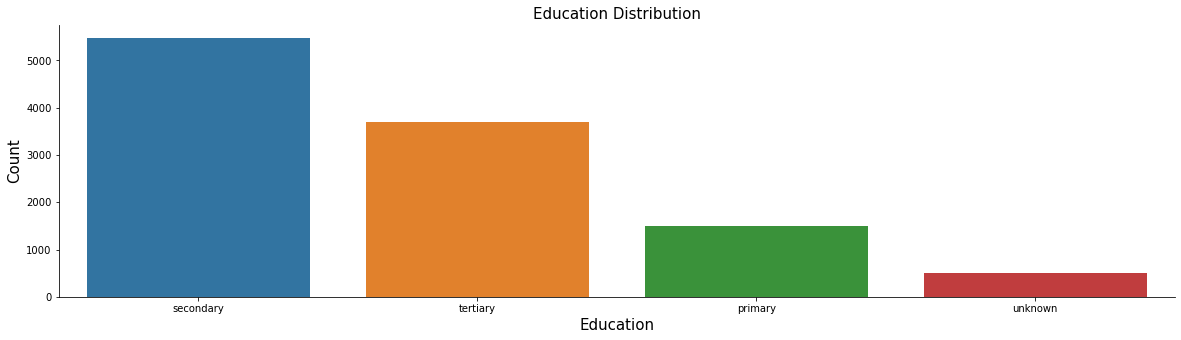

In [15]:
# Count plot of "education" feature.

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)    # Function for plotting the Count plot
ax.set_xlabel('Education', fontsize=15)               # Setting X-axis as "Education"  
ax.set_ylabel('Count', fontsize=15)                   # Setting Y-axis as "Count"
ax.set_title('Education Distribution', fontsize=15)   # Naming the title as "Education Distribution"
sns.despine()                                         # Remove the top and right spines from the plot.

* <font size = "3">From the above <span style = "color : green">***Count plot***</span>, it can be clearly seen that **most** of the **clients** have completed <span style = "color : blue">**secondary**</span> education.</font> 

## 5) Default, Housing, Loan Features

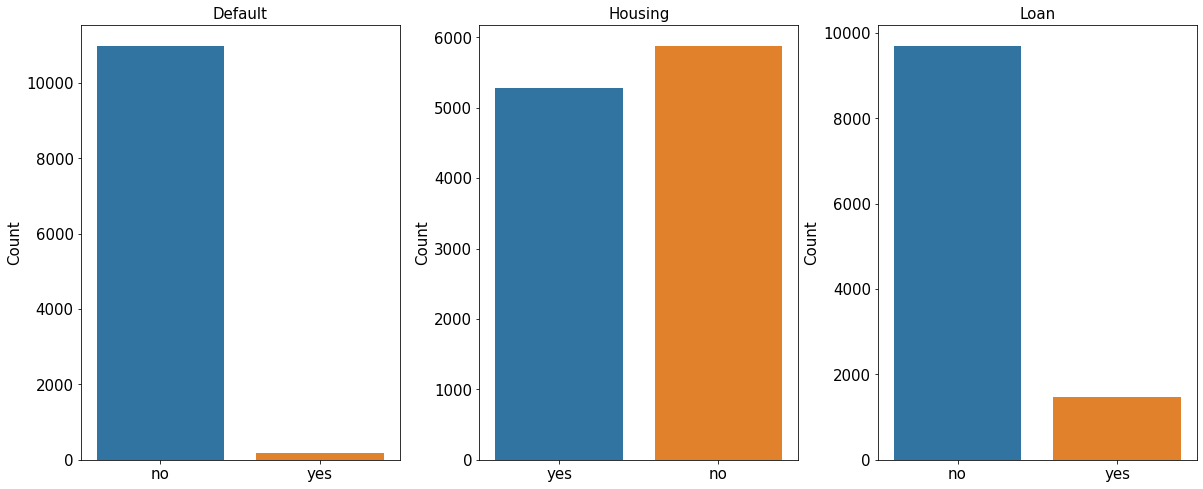

In [16]:
# Count plot of "default","housing", "loan" features.

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))

sns.countplot(x = 'default', data = bank_client, ax = ax1)    # Function for plotting the Count plot
ax1.set_title('Default', fontsize=15)                         # Naming the title as "Default"
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)                          # Setting Y-axis as "Count"
ax1.tick_params(labelsize=15)                                 # Setting ticklabel size

sns.countplot(x = 'housing', data = bank_client, ax = ax2)   # Function for plotting the Count plot
ax2.set_title('Housing', fontsize=15)                        # Naming the title as "Housing"
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)                         # Setting Y-axis as "Count"
ax2.tick_params(labelsize=15)                                 # Setting ticklabel size

sns.countplot(x = 'loan', data = bank_client, ax = ax3)     # Function for plotting the Count plot
ax3.set_title('Loan', fontsize=15)                         # Naming the title as "Loan"
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)                         # Setting Y-axis as "Count"
ax3.tick_params(labelsize=15)                                 # Setting ticklabel size

plt.subplots_adjust(wspace=0.25)                            # Adjusting space between plots

* <font size = "3">Inference from the above <span style = "color : green">***Count plots***</span>:-
    -  Except few, almost all **clients** have **credit** in default.
    -  **Most clients** have taken **housing loan**.
    -  **Very few** **clients** have **personal loan**.</font>

***

## Detection and Handling of Outliers

* <font size = "3"> Now, the **detection** of the **outliers** would be done. As the **prediction** has been done that the chances of **outliers** are in the above mentioned features. But, here **detection** of the **outliers** will be done in every **numerical** features and if present, they will be **handled**.</font>
* <font size = "3">The **detection** of the **outliers** will be done with the help of <span style = "color : green">**boxplot**</span>.</font>
* <font size = "3">The **spikes** which are be to the **right** of **right whisker** and to the **left** of **left whisker** are **outliers.** </font>

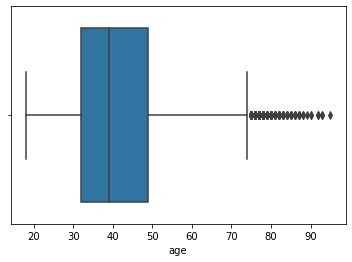

In [17]:
# Plotting boxplot of "age" column

sns.boxplot(bank_client['age'])
plt.show()

* <font size = "3"> As, there are black spikes to the right of right whisker which are **outliers**. 
  <br> So now, they will be **handled**. </font>

In [18]:
# Creating a function which will handle the outliers.

def handle_outliers(sample):
    tenth_percentile = np.percentile(sample, 10)           # tenth percentile value is stored
    ninetieth_percentile = np.percentile(sample, 90)       # ninetieth percentile value is stored
    sample = np.where(sample > ninetieth_percentile, ninetieth_percentile, sample)
    sample = np.where(sample < tenth_percentile, tenth_percentile, sample)
    return sample

* <font size = "3"> In the above function, all the values of a particular column above **90th percentile** are imputed as the **90th percentile** value and all the values below **10th percentile** are imputed as the **10th percentile**.</font>
* <font size = "3">This technique is called as **capping** the **outliers**.</font>  

In [19]:
# Implementing the above function in "age" column.

age = np.array(bank_client['age'])
bank_client['age'] = handle_outliers(age)

* <font size = "3">Now, the above method has worked or not is to be checked. So, for again the **boxplot** will be **plotted**.</font>

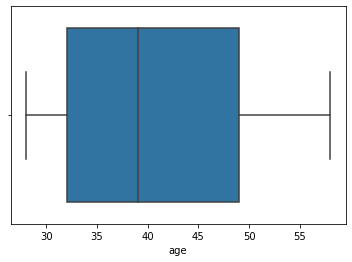

In [20]:
# Plotting a boxplot for "age" column once again

sns.boxplot(bank_client['age'])
plt.show()

* <font size = "3"> Now, there are no **spikes** in the above **boxplot** that means there are no **outliers** in the   
    "<span style="color: blue">***age***</span>" column.</font>
* <font size = "3">The same procedure is going to be implemented for other ***numerical*** features as well.</font> 

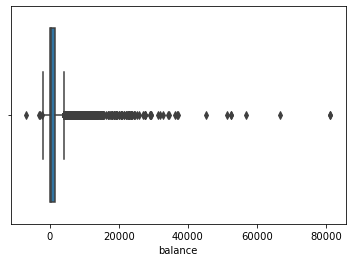

In [21]:
# Boxplot for "balance" column

sns.boxplot(bank_client['balance'])
plt.show()

* <font size = "3">In <span style = "color : blue">**balance**</span> column, **outliers** are present.</font>

In [22]:
# Implementing function on "balance" column for handling outliers.

balance = np.array(bank_client['balance'])
bank_client['balance'] = handle_outliers(balance)

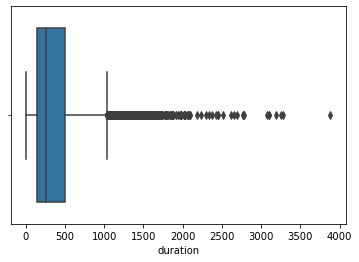

In [23]:
# Boxplot for "duration" column

sns.boxplot(bank_client['duration'])
plt.show()

* <font size = "3">In <span style = "color : blue">**duration**</span> column, **outliers** are present.</font>

In [24]:
# Implementing function on "duration" column for handling outliers.

duration = np.array(bank_client['duration'])
bank_client['duration'] = handle_outliers(duration)

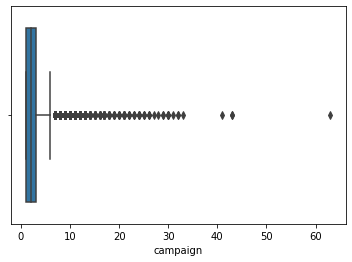

In [25]:
# Boxplot for "campaign" column

sns.boxplot(bank_client['campaign'])
plt.show()

* <font size = "3">In <span style = "color : blue">**campaign**</span> column, **outliers** are present.</font>

In [26]:
# Implementing function on "campaign" column for handling outliers.

campaign = np.array(bank_client['campaign'])
bank_client['campaign'] = handle_outliers(campaign)

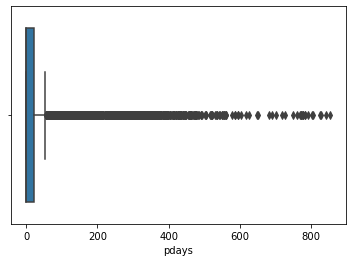

In [27]:
# Boxplot for "pdays" column

sns.boxplot(bank_client['pdays'])
plt.show()

* <font size = "3">In <span style = "color : blue">**pdays**</span> column, **outliers** are present.</font>

In [28]:
# Implementing function on "pdays" column for handling outliers.

pdays = np.array(bank_client['pdays'])
bank_client['pdays'] = handle_outliers(pdays)

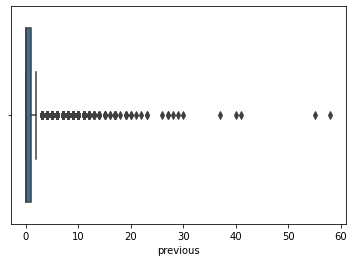

In [29]:
# Boxplot for "previous" column

sns.boxplot(bank_client['previous'])
plt.show()

* <font size = "3">In <span style = "color : blue">**previous**</span> column, **outliers** are present.</font>

In [30]:
# Implementing function on "previous" column for handling outliers.

previous = np.array(bank_client['previous'])
bank_client['previous'] = handle_outliers(previous)

* <font size = "3">Every **outliers** in the dataset have been handled by **capping** method.</font>

***

# <span style = "color : blue">Feature Engineering</span>

* <font size = "3">In this step, <span style = "color : maroon">**encoding**</span> of the **categorical** features will be done. As the **model** won't understand the object type of values, so that's why <span style = "color : maroon">**encoding**</span> is **mandatory**. </font>

In [31]:
# Checking the categorical columns
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  float64
 12  campaign   11162 non-null  float64
 13  pdays      11162 non-null  float64
 14  previous   11162 non-null  float64
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 1.4+ MB


* <font size = "3">There are **10** categorical columns.</font>

In [32]:
# Storing all the categorical columns in "columns_to_convert" variable
columns_to_convert = bank_client.select_dtypes('object').columns   
columns_to_convert

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

* <font size = "3">There are two methods of **Encoding** :-</font>
 
    - <font size = "3">**Label Encoding**</font>
 
    - <font size = "3">**One-Hot Encoding**</font>

## Label Encoding

* <font size = "3">In this method, the categorical columns which are **binary** i.e. having **two** categories will be **encoded**.</font>  

In [33]:
# Storing all binary categorical features in "label_encod_cols" list.
label_encod_cols = [col for col in columns_to_convert if bank_client[col].nunique() == 2]

In [34]:
label_encod_cols

['default', 'housing', 'loan', 'deposit']

* <font size = "3">Hence, the **binary** categorical columns are :- [<span style = "color : blue">"***default***"</span>,<span style = "color : blue"> "***housing***"</span>,<span style = "color : blue"> "***loan***"</span>,<span style = "color : blue"> "***deposit***"</span>].</font>

* <font size = "3">We are going to check the categories in all these columns.</font>

In [35]:
print("Default:", bank_client['default'].unique())
print("Housing:", bank_client['housing'].unique())
print("Loan:", bank_client['loan'].unique())
print("Deposit:", bank_client['deposit'].unique())

Default: ['no' 'yes']
Housing: ['yes' 'no']
Loan: ['no' 'yes']
Deposit: ['yes' 'no']


* <font size = "3">From above, it is seen that all **four** columns are having **"Yes"** and **"No"** values.</font>

In [36]:
# Mapping "yes" and "no" values with "1" and "0" respectively.
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [37]:
# Applying the above function in these 4 columns 
bank_client[label_encod_cols] = bank_client[label_encod_cols].apply(binary_map)

In [38]:
print("Default:", bank_client['default'].unique())
print("Housing:", bank_client['housing'].unique())
print("Loan:", bank_client['loan'].unique())
print("Deposit:", bank_client['deposit'].unique())

Default: [0 1]
Housing: [1 0]
Loan: [0 1]
Deposit: [1 0]


* <font size = "3">The above four columns are successfully **encoded**.</font>

## One Hot Encoding

* <font size = "3">In this method, the categorical columns who are having **more** than **two** categories are **encoded**.</font>

In [39]:
# Storing all multiclass categories in "one_hot_encod_cols" list.
one_hot_encod_cols = [col for col in columns_to_convert if bank_client[col].nunique() > 2]
one_hot_encod_cols

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

* The multiclass categorical columns are :- [<span style = "color : blue">"***job***"</span>,<span style = "color : blue"> "***marital***"</span>,<span style = "color : blue"> "***education***"</span>,<span style = "color : blue"> "***contact***"</span>, <span style = "color : blue"> "***month***"</span>,<span style = "color : blue"> "***poutcome***"</span>].</font>

* <font size = "3">In this method, <span style = "color : green">**dummy**</span> variables are going to be added, that means for **each category** of a feature, a column will be created.</font> 

In [40]:
# Creating dummy variable for getting dummies for every multiclass categorical features and also dropping the first dummy column of each feature.
dummy = pd.get_dummies(bank_client[one_hot_encod_cols], drop_first = True)

* <font size = "3">After creating <span style = "color : green">**dummy**</span> variable, it is added to the **dataset**.</font>

In [41]:
# Adding dummy to the dataset
bank_client = pd.concat([bank_client, dummy], axis = 1)

In [42]:
# The first five rows of the dataset
bank_client.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,admin.,married,secondary,0,2343.0,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
1,56.0,admin.,married,secondary,0,45.0,0,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
2,41.0,technician,married,secondary,0,1270.0,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
3,55.0,services,married,secondary,0,2476.0,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
4,54.0,admin.,married,tertiary,0,184.0,0,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1


* <font size = "3">After adding the <span style = "color : green">**dummy**</span> to the dataset, the original feature of which **dummies** are created are to be **dropped**.</font>

In [43]:
# Dropping the original multiclass categorical columns.
bank_client = bank_client.drop(one_hot_encod_cols, 1)

In [44]:
# Checking the shape(no. of rows and no. of columns) of the dataset.
bank_client.shape

(11162, 43)

* <font size = "3">Earlier there were **17** columns but after adding **dummies** to the dataset, the no. of columns have become **43**.</font> 

In [45]:
# Checking the datatype of every features.
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   default              11162 non-null  int64  
 2   balance              11162 non-null  float64
 3   housing              11162 non-null  int64  
 4   loan                 11162 non-null  int64  
 5   day                  11162 non-null  int64  
 6   duration             11162 non-null  float64
 7   campaign             11162 non-null  float64
 8   pdays                11162 non-null  float64
 9   previous             11162 non-null  float64
 10  deposit              11162 non-null  int64  
 11  job_blue-collar      11162 non-null  uint8  
 12  job_entrepreneur     11162 non-null  uint8  
 13  job_housemaid        11162 non-null  uint8  
 14  job_management       11162 non-null  uint8  
 15  job_retired          11162 non-null 

* <font size = "3">Now, all the columns are **numeric** type, so the **model** will be able to understand all the features.</font> 

## Data Splitting
* <font size = "3">The data is splitted into **input** variable and **output** variable(**target** variable) i.e. the **target** variable will be seperated from the **feature** variable.</font>

In [46]:
# Splitting the data
X = bank_client.drop(['deposit'], axis=1)   # Dropping the target feature "deposit" and all the input data are stored in "X" variable
y = bank_client['deposit']   # The output data is stored in "y" variable

* <font size = "3">**"X"** has become **input** variable.</font>
* <font size = "3">**"y"** has become **output** variable.</font>

## Multicollinearity
* <font size = "3"><span style = "color : green">**Multicollinearity**</span> occurs when **two** or more **independent** variables are **highly** correlated with one another. This means that an independent variable can be **predicted** from another independent variable.</font>
* <font size = "3">The features which are having <span style = "color : green">**multicollinearity**</span>, they aren't helping much with **prediction** and unnecessarily making the model **complex**.</font>
* <font size = "3">The features which are showing **high** <span style = "color : green">**multicollinearity**</span>, it's better to **drop** them.</font>

## VIF (Variance Inflation Factor)

* <font size = "3"><span style = "color : green">**VIF**</span> method is used to calculate <span style = "color : green">**VIF**</span> of every independent feature.</font>
* <font size = "3"><span style = "color : green">**VIF**</span> value helps to determine **multicollinearity**. **More** the value of <span style = "color : green">**VIF**</span>, **more** is the **multicollinearity**.</font>
* <font size = "3">**Minimum** value of <span style = "color : green">**VIF**</span> is **1**. <span style = "color : green">**VIF**</span> = **1** means there is no **correlation** between the particular independent variable with the others.</font>
* <font size = "3"><span style = "color : green">**VIF**</span> exceeding **5** indicates **high** **multicollinearity** between the particular independent variable and the others.</font>

In [47]:
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

* <font size = "3">Since, <span style = "color : green">**VIF**</span> is calculated for independent variables, that means **input** data will be considered for checking <span style = "color : green">**VIF**</span>.</font> 

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X.columns   # storing all independent columns under "Features" column of "vif" dataframe.
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # storing "VIF" of each independent feature in "VIF" column of "vif" dataframe.
vif['VIF'] = round(vif['VIF'], 2)     # rounding of VIFs with 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False)      # sorting "vif" dataframe with the decreasing order of "VIFs"
vif     

,Features,VIF
41,poutcome_unknown,34.42
0,age,24.77
8,pdays,8.00
9,previous,6.12
21,marital_married,5.67
5,day,5.46
23,education_secondary,5.13
24,education_tertiary,5.11
35,month_may,4.63
7,campaign,4.07


* <font size = "3">From the above result, it is visible that <span style = "color : blue">**"poutcome_unknown"**</span> feature is having **highest** <span style = "color : green">**VIF**</span> and it is much **greater** than **5**. That means, it is showing the **highest multicollinearity** in the dataset.</font>
* <font size = "3">The <span style = "color : blue">**"poutcome_unknown"**</span> feature will be **dropped**. After **dropping** it, <span style = "color : green">**VIFs**</span> of other independent features will **decrease**.</font>

In [49]:
# Dropping the feature "poutcome_unknown".
X = X.drop('poutcome_unknown', axis=1)

* <font size = "3">After dropping the above feature, <span style = "color : green">**VIF**</span> is **computed** again.</font>

In [50]:
# Calculating "VIF" after dropping "poutcome_unknown" feature.
vif = pd.DataFrame()           # Dataframe is to be created again after dropping "poutcome_unknown" feature.
vif['Features'] = X.columns   # storing all independent columns under "Features" column of "vif" dataframe.
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # storing "VIF" of each independent feature in "VIF" column of "vif" dataframe.
vif['VIF'] = round(vif['VIF'], 2)     # rounding of VIFs with 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False)      # sorting "vif" dataframe with the decreasing order of "VIFs"
vif     

,Features,VIF
0,age,18.00
21,marital_married,5.39
5,day,5.28
9,previous,4.87
24,education_tertiary,4.84
23,education_secondary,4.71
8,pdays,4.60
35,month_may,4.43
7,campaign,4.00
13,job_management,3.85


* <font size = "3">From above result, <span style = "color : green">**VIF**</span> of <span style = "color : blue">**"age"**</span> feature is **highest** and it is **greater** than **5**, so now <span style = "color : blue">**"age"**</span> feature will be **dropped**.</font>

In [51]:
# Dropping the feature "age".
X = X.drop(['age'], axis=1)

* <font size = "3">After dropping the above feature, <span style = "color : green">**VIF**</span> is **computed** again.</font>

In [52]:
# Calculating "VIF" after dropping "age" feature.
vif = pd.DataFrame()           # Dataframe is to be created again after dropping "age" feature.
vif['Features'] = X.columns   # storing all independent columns under "Features" column of "vif" dataframe.
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # storing "VIF" of each independent feature in "VIF" column of "vif" dataframe.
vif['VIF'] = round(vif['VIF'], 2)     # rounding of VIFs with 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False)      # sorting "vif" dataframe with the decreasing order of "VIFs"
vif     

,Features,VIF
20,marital_married,5.19
4,day,5.02
8,previous,4.87
23,education_tertiary,4.76
7,pdays,4.59
22,education_secondary,4.47
34,month_may,4.07
6,campaign,3.96
12,job_management,3.67
21,marital_single,3.50


* <font size = "3">From above result, <span style = "color : green">**VIF**</span> of <span style = "color : blue">**"marital_married"**</span> feature is **highest** and it is **greater** than **5**, so now <span style = "color : blue">**"marital_married"**</span> feature will be **dropped**.</font>

In [53]:
# Dropping the feature "marital_married".
X = X.drop(['marital_married'], axis=1)

* <font size = "3">After dropping the above feature, <span style = "color : green">**VIF**</span> is **computed** again.</font>

In [54]:
# Calculating "VIF" after dropping "marital_married" feature.
vif = pd.DataFrame()           # Dataframe is to be created again after dropping "marital_married" feature.
vif['Features'] = X.columns   # storing all independent columns under "Features" column of "vif" dataframe.
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # storing "VIF" of each independent feature in "VIF" column of "vif" dataframe.
vif['VIF'] = round(vif['VIF'], 2)     # rounding of VIFs with 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False)      # sorting "vif" dataframe with the decreasing order of "VIFs"
vif     

,Features,VIF
4,day,4.93
8,previous,4.86
22,education_tertiary,4.66
7,pdays,4.58
21,education_secondary,4.30
33,month_may,3.97
6,campaign,3.94
12,job_management,3.60
5,duration,2.81
2,housing,2.58


* <font size = "3">Now every features have <span style = "color : green">***VIF***</span> less than **5**.
So the features which were showing **multicollinearity** are **dropped**.</font>

## Analysis of Target Data

In [55]:
# Checking the total no. of values in "target" variable 
y.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

* <font size = "3">Since **"target"** variable has only **two** values, hence this is **classification** problem. </font>

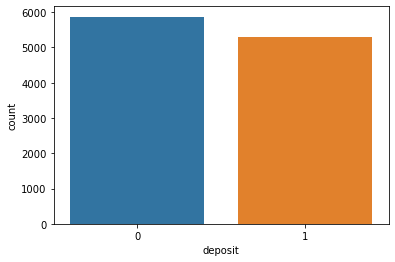

In [56]:
# Plotting the Count plot for checking the total number of each value of "target" variable
sns.countplot(y)
plt.show()

* <font size ="3">From the <span style = "color : green">***Count plot***</span> above, it is clearly seen that there is **not much difference** between the number of both values, so it could be said that the **output** variable is well **stratified**.</font>

## Feature Selection

* <font size = "3">The **features** which are **not well correlated** with **target** variable are considered **redundant** and **irrelevant**.</font> 
* <font size = "3">Using <span style = "color : green">**Feature Selection**</span>, those **irrelevant** columns will be **identified** and they will be **dropped**.</font>
* <font size = "3"><span style = "color : green">**Feature Selection**</span> helps **training** the **machine learning algorithm faster**.</font>

* <font size = "3">The method of <span style = "color : green">**Feature Selection**</span> going to be used is <span style = "color : maroon">**Wrapper Method**</span>.</font>
* <font size = "3">The <span style = "color : maroon">**Wrapper Method**</span> will be <span style = "color : purple">**Extra Trees Classifier**</span>.</font>

* <font size = "3">In <span style = "color : maroon">**Wrapper Method**</span>, the **model** is built and **score** of each **feature** is **calculated**.</font>

In [57]:
# Model Building Using "ExtraTreesClassifier".
from sklearn.ensemble import ExtraTreesClassifier    # Importing "ExtraTreesCLassifier" method

model = ExtraTreesClassifier()   # Building model using "ExtraTreesClassifier"
model.fit(X,y)                   #  Fitting the "input" data and "output" data in the model.

ExtraTreesClassifier()

* <font size = "3">The **model** is built and now the **score** of each **feature** will be **calculated**.</font>

In [58]:
dfsco = pd.DataFrame(model.feature_importances_)  # a dataframe having scores of each feature
dfcols = pd.DataFrame(X.columns)  # a dataframe having column names 

feat_importances = pd.concat([dfcols, dfsco], axis = 1)   # a new dataframe created by concatenating column names and respective scores
feat_importances.columns = ['specs', 'score']    # naming columns of the new dataframe

feat_importances    

,specs,score
0,default,0.002919
1,balance,0.077189
2,housing,0.032314
3,loan,0.014988
4,day,0.079478
5,duration,0.313540
6,campaign,0.047911
7,pdays,0.027211
8,previous,0.027010
9,job_blue-collar,0.011263


* <font size = "3">The **score** of the **feature** depicts its **importance** in the **model building**.</font> 
* <font size = "3">**Higher** the **score**, **higher** is its **importance** and **vice-versa**.</font>  

In [59]:
df = feat_importances.nlargest(15, 'score') # The top 15 features according to the "score" value is stored in "df" variable
df

,specs,score
5,duration,0.313540
4,day,0.079478
1,balance,0.077189
38,poutcome_success,0.050150
6,campaign,0.047911
25,contact_unknown,0.041422
2,housing,0.032314
7,pdays,0.027211
8,previous,0.027010
20,marital_single,0.018823


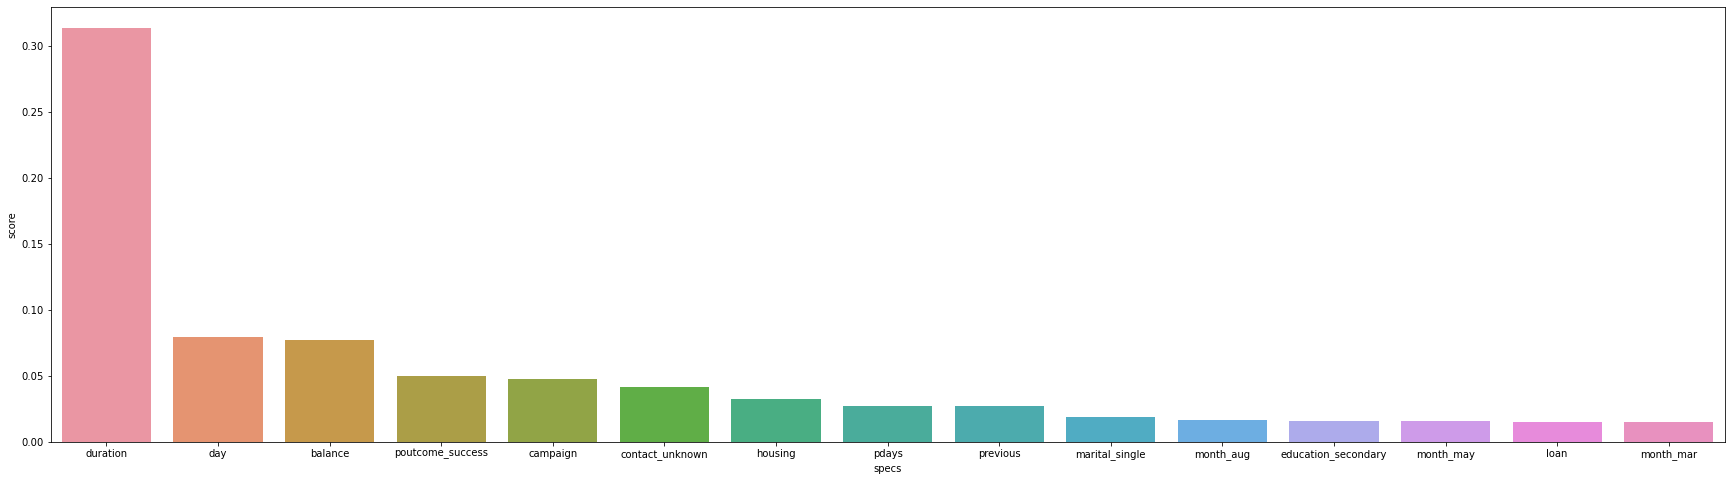

In [60]:
# Plotting a bar graph for the top 15 columns having highest scores
fig, ax = plt.subplots(figsize=(30, 8))
sns.barplot(x = df['specs'], y = df['score'], ax = ax)
plt.show()

* <font size = "3">The first **15** columns having **highest** scores are **selected** because these features are considered **important** for **model building** while the rest features are considered **redundant**. Hence, those **redundant** features are **not selected** for the **model building** which will be done later.</font>
* <font size = "3">The <span style = "color : blue">**"duration"**</span> feature is having the **highest** score, that means it is the **most important** feature for **model building**.</font> 
* <font size = "3">Now, the **input** variable will be **modified** by having only the **15** most important features.</font>

In [61]:
inp = X[df['specs']]    # Storing 15 important features as "input" and storing them in "inp" variable
out = y                 # Storing "target" data in "out" variable

* <font size = "3"><span style = "color : blue">**"Duration"**</span> feature tells about the **duration** of the **last contact** of **client** with the **bank**.</font>
* <font size = "3"><span style = "color : blue">**"Duration"**</span> feature is the **most** important feature, that means it will make the **most impact** in the **prediction**. In other words, it can be said that the **duration** of the **last contact** of **client** with the **bank** will make more impact  in **predicting** whether the **client** has **subscribed** a term **deposit** or not.</font>


***

# <span style = "color : blue">Model Training & Prediction</span>

## Train-Test Split

* <font size = "3">In the first stage of **model training**, the dataset is going to be **splitted** into **two** sections :-
 * **Train Data**
 * **Test Data** </font>
  
* <font size = "3">**Train data** will be **passed** to the **model** during **training** of the **model**.</font>
* <font size = "3">**Test data** will be used for **testing**, i.e. it will be used after **training** of the **model**. </font>

In [62]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(inp, out, train_size=0.7, random_state=42)  # random_state will split the data randomly.
# Splitting the whole data into train data and test data with training size 70%.

* <font size = "3">The data is **splitted** in such a way that **70%** of the data is splitted for **train data** while rest **30%** for **test data**.</font>
* <font size = "3">The use of <span style = "color : green">**"random_state"**</span> function above is for selecting the data for **training** from **random** rows.</font>
* <font size = "3">The **input** data for **train** data is passed to <span style = "color : blue">**"X_train"**</span> variable.</font>
* <font size = "3">The **output** data for **train** data is passed to <span style = "color : blue">**"y_train"**</span> variable.</font>
* <font size = "3">The **input** data for **test** data is passed to <span style = "color : blue">**"X_test"**</span> variable.</font>
* <font size = "3">The **output** data for **test** data is passed to <span style = "color : blue">**"y_test"**</span> variable.</font>

* <font size = "3">Though the **model** is going to be trained using **train** data which has been got from <span style = "color : green">**Train-Test Split**</span> method but for evaluating the **accuracy** of the model, <span style = "color : green">**K-Fold Cross Validation**</span> is going to be used.</font>

## K-Fold Cross Validation

* <font size = "3">Using this method, for **"k"** number of times, the set of **train** data and the set of **test** data are selected from the whole dataset.
* <font size = "3">In each of the **"k"** number of times, the whole dataset divides into **"k"** number of folds where the **train** data gets **"k-1"** folds and the **test** data gets remaining i.e. a **single** fold and the **accuracy** of the **model** is evaluated.</font>
* <font size = "3">The above step is the same for every **"k"** times but the difference lies in the **train** data and **test** data. Both set of **train** data and **test** data will be different for each of the **"k"** times.</font>
* <font size = "3">This method is used for getting the most **optimum accuracy score** of the **model**.</font>

In [63]:
from sklearn.model_selection import KFold, cross_val_score # KFold and cross_val_score is imported

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)# KFold method where "k" value taken is 10

* <font size = "3">**"k"** is **10** that means for **10** times, the different set of **train** data and **test** data is selected.</font>
* <font size = "3">**"shuffle"** parameter is **True** that means first the whole data will be **shuffled** i.e. **position** of each datapoints will **change**. After **shuffling**, the data will be splitted into **K-Folds**(in this case **10-Folds**).</font>
* <font size = "3">For each of the **ten** times, **training** of the **model** will be done and **accuracy** of the model will be **evaluated**.</font>
* <font size = "3">As there is 10-Fold, so there will be **10** number of **accuracy scores**.</font>
* <font size = "3">Since, only one value of **accuracy** will be accepted so to get that, the mean of all **accuracy scores** will be calculated and it will be the **final accuracy score** of the **model**.</font>

## Model 1 - Logistic Regression

* <font size = "3">This algorithm predicts the result using the <span style = "color : purple">**Sigmoid function**</span>.</font>
* <font size = "3">The equation of <span style = "color : purple">**Sigmoid function**</span> is :-
    <span style = "color : green">**$$y = {1 \over 1 + e^{-x}}$$**</span></font>

* <font size = "3">The **first** model is going to be trained using <span style = "color : green">"***Logistic Regression***"</span> algorithm.</font>

In [68]:
from sklearn.linear_model import LogisticRegression   # Importing "LogisticRegression" 

log_model = LogisticRegression()  # This is first model "log_model" built using LogisticRegression algorithm 
log_model.fit(X_train,y_train)    # Fitting "train data" to the "log_model" 

LogisticRegression()

* <font size = "3">The <span style = "color : purple">**"log_model"**</span> is trained using <span style = "color : green">"***Logistic Regression***"</span> algorithm.</font>

* <font size = "3">Since, the **model** is trained, so now the **prediction** could be done.</font>
* <font size = "3">**Prediction** means for given **input** data, what **model** is **predicting** as **output**.</font>
* <font size = "3">For **prediction**, the **input** data which is going to be passed to the **model** is **input test data** which is <span style = "color : green">**"X_test"**</span>.</font> 

In [69]:
# The prediction is done by passing "X_test" and the predicted values are stored in "log_pred" variable.
log_pred = log_model.predict(X_test) 

* <font size = "3">After prediction, **accuracy** of the **model** is to be **evaluated**.</font>
* <font size = "3">**Accuracy** is the measure of how much **correct** prediction **model** has made. The **correct** prediction means for a particular data, the model is giving **same** result as what the **actual** result was.</font>
* <font size = "3"><span style = "color : green">**"cross_val_score"**</span> method is going to be used which will calculate all the **accuracy scores** of <span style = "color : purple">**K-Fold Cross Validation**</span>, where **"k"** is **10**.</font>
* <font size = "3">In <span style = "color : green">**"cross_val_score"**</span> method, the **input** and **output** data going to be passed is from the whole dataset, rather than passing only the **train** data. This is because **K-Fold** will split the data into **test** and **train**. So this is why the whole dataset will be passed.</font>

In [71]:
# mean of accuracy scores of all K-Folds is stored in "log_score" variable
log_score = cross_val_score(log_model, inp, out, cv = k_fold, n_jobs = -1).mean()  
log_score

0.8085491251207311

* <font size = "3">Hence the **accuracy** for <span style = "color : green">"***Logistic Regression***"</span> model is **0.8085491251207311**, i.e **80.85%** which is **very good**.</font>
* <font size = "3">It means that out of **100%** data, **80.85%** data points are **correctly predicted**.</font> 

* <font size = "3">In the above method, **n_jobs** parameter is used.</font> 
* <font size = "3">**n_jobs** is used for **parallel computation** in the **model evaluation** stage.</font>
* <font size = "3">The value of **n_jobs** will decide how many **CPUs** of our system will be used for the **computation**.</font>
* <font size = "3">The value of **n_jobs** in this case is taken as **-1**, that means all the present **CPUs** of the system will be used for **computation**.</font> 

* <font size = "3">Since **multiple** models is going to be used, hence the **accuracy** of each model has to be stored.</font>

In [82]:
# Creating a dictionary "models_with_scores" and storing algorithm name as key and its corresponding value is its "accuracy"
models_with_scores = {}
models_with_scores['Logistic Regression'] = log_score

## Model 2 - Decision Trees

* <font size = "3">This algorithm uses the technique of **tree splitting**.</font>
* <font size = "3">The **splitting** of **tree** is done by taking some conditions with some values of **feature** variable.</font>
* <font size = "3">There are two criterias for **tree splitting** :-</font>
    * <font size = "3"><span style = "color : green">**Gini Impurity**</span></font>
    * <font size = "3"><span style = "color : green">**Information Gain**</span></font>

* <font size = "3">The **second** model is going to be trained using <span style = "color : green">"***Decision Trees***"</span> algorithm.</font>

In [83]:
from sklearn.tree import DecisionTreeClassifier     # Importing "DecisionTreeClassifier" 

dtree_model = DecisionTreeClassifier(criterion = 'gini')  # The "dtree_model" is built using Decision Tree algorithm 
dtree_model.fit(X_train, y_train)     # Fitting "train data" to the "dtree_model"  

DecisionTreeClassifier()

* <font size = "3">The <span style = "color : purple">**"dtree_model"**</span> is trained using <span style = "color : green">"***Decision Trees***"</span> algorithm.</font>

* <font size = "3">In this algorithm, **criterion** parameter is used.</font>
* <font size = "3">The **criterion** used in this case is <span style = "color : green">**gini**</span> which means that the tree has splitted above based on the **gini** value.</font>
* <font size = "3"><span style = "color : green">**Gini**</span> is the **probability** of correctly labelling a randomly chosen element, if it was randomly labelled according to the **distribution** of labels in the node.</font>

In [85]:
# The prediction is done by passing "X_test" and the predicted values are stored in "dtree_pred" variable.
dtree_pred = dtree_model.predict(X_test)

In [105]:
# mean of accuracy scores of all K-Folds is stored in "dtree_score" variable
dtree_score = cross_val_score(dtree_model, inp, out, cv = k_fold, n_jobs = -1).mean()
dtree_score

0.7580195127116605

* <font size = "3">Hence the **accuracy** for <span style = "color : green">"***Decision Trees***"</span> model is **0.7580195127116605**, i.e **75.80%** which is **decent**.</font>
* <font size = "3">It means that out of **100%** data, **75.80%** data points are **correctly predicted**.</font> 

In [87]:
# Storing the algorithm name with accuracy in "models_with_scores" dictionary
models_with_scores['Decision Trees'] = dtree_score

## Model 3 :-   K-Nearest Neighbors 

* <font size = "3">In this algorithm, for a given value of **"k"**, the **"k"** number of points are considered which are the **most closest** to the for each **datapoint**.</font>
* <font size = "3">After that, the **classes** of those **"k"** points are identied and then it is found out that which **class** has **more** number of points in those **"k"** points.</font>
* <font size = "3">That **class** will be the **class** of the particular **datapoint**.</font>

* <font size = "3">The **third** model is going to be trained using <span style = "color : green">"***KNN***"</span> algorithm.</font>

* <font size = "3">The **model** is built using <span style = "color : green">**KNeighborsClassifier**</span>.</font>
* <font size = "3"><span style = "color : green">**KNeighborsClassifier**</span> takes the value of **"k"** for the training of **model**.</font>
* <font size = "3">The value of **"k"** should be that which gives the **best** performance of the **model**.</font>
* <font size = "3">For multiple values of **"k"**, the **model** is trained and the **train error** and **test error** are calculated.</font>

## Finding the optimal value of "k"

In [89]:
from sklearn.neighbors import KNeighborsClassifier    # Importing "KNeighborsClassifier" 

train_error = []     # list created for storing the error of train data
test_error = []      # list created for storing the error of test data

for i in range(1,40):              # The range of "k" value is 1 to 40
    knn_model = KNeighborsClassifier(n_neighbors = i)     # model building with "k" value initially 1
    knn_model.fit(X_train, y_train)                       # fitting train data to the model
    knn_pred_train = knn_model.predict(X_train)           # predicting through train data
    knn_pred_test = knn_model.predict(X_test)             # predicting through test data
    
    train_error.append(np.mean(y_train != knn_pred_train))  # ratio of train error with the total train data is added to the error list
    test_error.append(np.mean(y_test != knn_pred_test))     # ratio of test error with the total test data is added to the error list
    
print("Train error:\n", train_error)   
print("Test error:\n", test_error)

Train error:
 [0.0, 0.16165365416613336, 0.1528222193779598, 0.19121976193523615, 0.1857161141686932, 0.20107513119160375, 0.19569947523358505, 0.20401894278766158, 0.20069115576603097, 0.2084986560860105, 0.20913861512863177, 0.20977857417125303, 0.2113144758735441, 0.2129783693843594, 0.21323435300140792, 0.21182644310764112, 0.21259439395878663, 0.21400230385255345, 0.2146422628951747, 0.215794189171893, 0.21592218098041727, 0.21771406629975681, 0.21873800076795086, 0.22014591066171765, 0.2195059516190964, 0.21924996800204788, 0.22091386151286319, 0.22078586970433892, 0.22078586970433892, 0.21937795981057212, 0.22104185332138743, 0.2230897222577755, 0.22180980417253296, 0.22526558300268784, 0.2236016894918725, 0.22808140279022143, 0.22718546013055166, 0.22769742736464865, 0.22577755023678484]
Test error:
 [0.2988951925948044, 0.30128396536279484, 0.26336219767094654, 0.26366079426694533, 0.2547028963869812, 0.25082114063899674, 0.244252015527023, 0.24604359510301582, 0.2409674529710

* <font size = "3">The **train error** and **test error** of the **model** for multiple values of **"k"** is calculated.</font>
* <font size = "3">For each value of **"k"**, the **train error** and **test error** values are observed.</font>
* <font size = "3">Where the **average** of **train error** and **test error** is **minimum**, that value of **"k"** is the **optimal** value of **"k"**.</font>
* <font size = "3">From the above, it is **ambiguish** to understand where the **error** is **minimum**, so for this **visualization** should be used.</font>

# Visualizing the Errors

* <font size = "3">The above **train error** and **test error** calculated is **visualized** with the help of <span style = "color : purple">**line plot**</span>.</font>

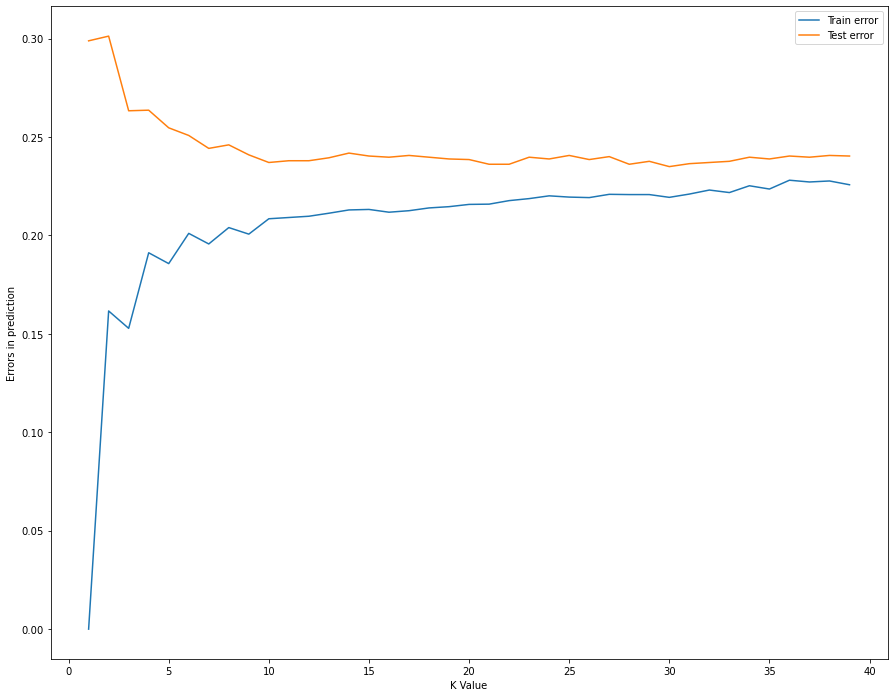

In [95]:
plt.figure(figsize = (15,12))     #   Setting the size of the figure

sns.lineplot(x = range(1,40), y = train_error, label = "Train error")    #  lineplot for train error
sns.lineplot(x = range(1,40), y = test_error, label = "Test error")      #  lineplot for test error
plt.xlabel('K Value')          # naming x-axis as "K Value"
plt.ylabel('Errors in prediction')     # naming y-axis as "Errors in prediction"
plt.show()

* <font size = "3">From the <span style = "color : purple">**line plot**</span>, the **average** of **train error** and **test error** is **minimum** nearly at **"k"=22**.</font> 
* <font size = "3">The **optimum** value of **"k"** to be considered is **22**.</font>
* <font size = "3">That means the **accuracy** of the **model** will be **high** at this particular value of **"k"**.</font>

## Model Training & Prediction Using Optimal Value of "k"

* <font size = "3">Now, the **model** will be **trained** using the **optimal** value of **"k"**.</font>

In [96]:
knn_model = KNeighborsClassifier(n_neighbors = 22)   # model building using "KNeighborsClassifier"
knn_model.fit(X_train, y_train)       #   fitting train data to the "knn_model"

KNeighborsClassifier(n_neighbors=22)

* <font size = "3">The <span style = "color : purple">**"knn_model"**</span> is trained using <span style = "color : green">"***K-Nearest Neighbors***"</span> algorithm.</font>

In [97]:
# storing the predicting values in "knn_pred"
knn_pred = knn_model.predict(X_test)    

In [106]:
# mean of accuracy scores of all K-Folds is stored in "knn_score" variable
knn_score = cross_val_score(knn_model, inp, out, cv = k_fold, n_jobs = -1).mean()
knn_score

0.7650059523236524

* <font size = "3">Hence the **accuracy** for <span style = "color : green">"***K-Nearest Neighbors***"</span> model is **0.7650059523236524**, i.e **76.50%** which is **decent**.</font>
* <font size = "3">It means that out of **100%** data, **76.50%** data points are **correctly predicted**.</font> 

In [107]:
# Storing the algorithm name with accuracy in "models_with_scores" dictionary
models_with_scores['K-Nearest Neighbors'] = knn_score

## Model 4 - Naive Bayes 

* <font size = "3">This algorithm does prediction on the basis of <span style = "color : purple">**Baye's Theorem of Probability**</span>.</font>
* <font size = "3">The formula for <span style = "color : purple">**Baye's Theorem**</span> is :-
    <span style = "color : green">$$P(A/B) = {{P(B/A).P(A)} \over P(B)}$$</span></font>

* <font size = "3">The **fourth** model is going to be trained using <span style = "color : green">"***Naive Bayes***"</span> algorithm.</font>

In [108]:
from sklearn.naive_bayes import GaussianNB    # Importing "GaussianNB" 

nb_model = GaussianNB()              # model building using "GaussianNB"
nb_model.fit(X_train, y_train)       # Fitting "train data" to the "nb_model" 

GaussianNB()

* <font size = "3">The <span style = "color : purple">**"nb_model"**</span> is trained using <span style = "color : green">"***Naive Bayes***"</span> algorithm.</font>

In [160]:
# storing the predicting values in "nb_pred"
nb_pred = nb_model.predict(X_test)

In [109]:
# mean of accuracy scores of all K-Folds is stored in "nb_score" variable
nb_score = cross_val_score(nb_model, inp, out, cv = k_fold, n_jobs = -1).mean()
nb_score

0.7225404549436374

* <font size = "3">Hence the **accuracy** for <span style = "color : green">"***Naive Bayes***"</span> model is **0.7225404549436374**, i.e **72.25%** which is **fairly decent**.</font>
* <font size = "3">It means that out of **100%** data, **72.25%** data points are **correctly predicted**.</font> 

In [110]:
# Storing the algorithm name with accuracy in "models_with_scores" dictionary
models_with_scores['Naive Bayes'] = nb_score

## Model 5 - Support Vector Machines

* <font size = "3">This algorithm does prediction using a <span style = "color : green">**hyperplane**</span> that distinctly **classifies** the data points.</font>
* <font size = "3">There could be **multiple** <span style = "color : green">**hyperplanes**</span> but only one **optimal** <span style = "color : green">**hyperplane**</span> will be selected.</font>
* <font size = "3">An **optimal** <span style = "color : green">**hyperplane**</span> is one where the **marginal distance**(distance between <span style = "color : green">**hyperplane**</span> & **margins**) is **maximum**.</font>
* <font size = "3">A **margin** is drawn **touching** the **most nearest** data points to the <span style = "color : green">**hyperplane**</span>.</font>

* <font size = "3">The **fifth** model is going to be trained using <span style = "color : green">"***Support Vector Machines***"</span> algorithm.</font>

In [111]:
from sklearn.svm import SVC       # Importing "SVC(Support Vector Classifier)"

svc_model = SVC()                 # model building using "SVC(Support Vector Classifier)"
svc_model.fit(X_train, y_train)   # Fitting "train data" to the "svc_model" 

SVC()

* <font size = "3">The <span style = "color : purple">**"svc_model"**</span> is trained using <span style = "color : green">"***Support Vector Machines***"</span> algorithm.</font>

In [114]:
# storing the predicting values in "svc_pred"
svc_pred = svc_model.predict(X_test)

In [117]:
# mean of accuracy scores of all K-Folds is stored in "svc_score" variable
svc_score = cross_val_score(svc_model, inp, out, cv = k_fold).mean()
svc_score

0.7533610573637142

* <font size = "3">Hence the **accuracy** for <span style = "color : green">"***Support Vector Machines***"</span> model is **0.7533610573637142**, i.e **75.34%** which is **decent**.</font>
* <font size = "3">It means that out of **100%** data, **75.34%** data points are **correctly predicted**.</font> 

In [118]:
# Storing the algorithm name with accuracy in "models_with_scores" dictionary
models_with_scores['Support Vector Machine'] = svc_score

## Model 6 - Random Forest

* <font size = "3">This algorithm is the combination of multiple <span style = "color : green">**Decision trees**</span> each giving different results.</font>
* <font size = "3">It is also known as **ensemble learning technique** because here the results of **multiple** models are combined to predict the results.</font>
* <font size = "3">The **sampling** done in <span style = "color : green">**Random Forest**</span> is with **replacement** i.e. there may be **repetition** of some data points in a **sample**, and this **sampling** is known as <span style = "color : purple">**Bootstrap Sampling**</span>.</font>
* <font size = "3"><span style = "color : green">**Random forest**</span> is a part of <span style = "color : purple">**Bagging technique**</span> which means the combination of **bootstrap** and **aggregate**, i.e. taking **bootstrap** samples from data and calculating the **aggregate**(**mean** or **highest frequency**) from the results.</font>

* <font size = "3">The **sixth** model is going to be trained using <span style = "color : green">"***Random Forest***"</span> algorithm.</font>

* <font size = "3">The <span style = "color : purple">**n_estimators**</span> parameter is used for <span style = "color : green">**"RandomForestClassifier"**</span></font>.
* <font size = "3"><span style = "color : purple">**n_estimators**</span> depicts the number of **trees** used for **model training**.</font>

In [119]:
from sklearn.ensemble import RandomForestClassifier    # Importing "RandomForestClassifier" 

randforest_model = RandomForestClassifier(n_estimators = 100)      # model building using "RandomForestClassifier"
randforest_model.fit(X_train, y_train)           # Fitting "train data" to the "randforest_model" 

RandomForestClassifier()

* <font size = "3">The <span style = "color : purple">**"randforest_model"**</span> is trained using <span style = "color : green">"***Random Forest***"</span> algorithm by taking **100 trees**.</font>

In [121]:
# storing the predicting values in "randforest_pred"
randforest_pred = randforest_model.predict(X_test)

In [122]:
# mean of accuracy scores of all K-Folds is stored in "randforest_score" variable
randforest_score = cross_val_score(randforest_model, inp, out, cv = k_fold, n_jobs = -1).mean()
randforest_score

0.8291560375172875

* <font size = "3">Hence the **accuracy** for <span style = "color : green">"***Random Forest***"</span> model is **0.8291560375172875**, i.e **82.92%** which is **very good**.</font>
* <font size = "3">It means that out of **100%** data, **82.92%** data points are **correctly predicted**.</font> 

In [123]:
# Storing the algorithm name with accuracy in "models_with_scores" dictionary
models_with_scores['Random Forest'] = randforest_score

## Model 7 - Gradient Boosting

* <font size = "3">It gives a prediction model in the form of an **ensemble** of **weak** prediction models, which are typically <span style = "color : green">**Decision trees**</span>.</font>
* <font size = "3">It is also known as **ensemble learning technique** because here the results of **multiple** models are combined to predict the results.</font>
* <font size = "3">It is a part of <span style = "color : purple">**Boosting technique**</span> which means a **first** model is built on the **training** dataset, then a **second** model is built to **rectify** the **errors** present in the **first** model. This procedure is continued until and unless the **errors** are **minimized**, and the dataset is predicted **correctly**.</font>
* <font size = "3"><span style = "color : green">**Gradient boosting**</span> has a **fixed base estimator** and it **minimizes bias error** of the model.</font>

* <font size = "3">The **seventh** model is going to be trained using <span style = "color : green">"***Gradient Boosting***"</span> algorithm.</font>

In [124]:
from sklearn.ensemble import GradientBoostingClassifier    # Importing "GradientBoostingClassifier" 

gb_model = GradientBoostingClassifier()          # model building using "GradientBoostingClassifier"
gb_model.fit(X_train, y_train)                  # Fitting "train data" to the "gb_model" 

GradientBoostingClassifier()

* <font size = "3">The <span style = "color : purple">**"gb_model"**</span> is trained using <span style = "color : green">"***Gradient Boosting***"</span> algorithm.</font>

In [125]:
# storing the predicting values in "gb_pred"
gb_pred = gb_model.predict(X_test)

In [126]:
# mean of accuracy scores of all K-Folds is stored in "gb_score" variable
gb_score = cross_val_score(gb_model, inp, out, cv = k_fold, n_jobs = 1).mean()
gb_score

0.8301400159798231

* <font size = "3">Hence the **accuracy** for <span style = "color : green">"***Gradient Boosting***"</span> model is **0.8301400159798231**, i.e **83.01%** which is **very good**.</font>
* <font size = "3">It means that out of **100%** data, **83.01%** data points are **correctly predicted**.</font> 

In [127]:
# Storing the algorithm name with accuracy in "models_with_scores" dictionary
models_with_scores['Gradient Boosting'] = gb_score

## Model 8 - Extreme Gradient Boosting

* <font size = "3"><span style = "color : green">**Extreme Gradient Boosting**</span> is an efficient **open-source** implementation of the **stochastic** <span style = "color : green">**gradient boosting**</span> ensemble algorithm.</font>
* <font size = "3"><span style = "color : green">**XGBoost**</span> is a more **regularized** form of <span style = "color : green">**Gradient Boosting.**</span></font>
* <font size = "3"><span style = "color : green">**XGBoost**</span> uses **advanced regularization** (**L1** & **L2**), which improves **model generalization** capabilities.</font>
* <font size = "3"><span style = "color : green">**XGBoost**</span> delivers **high** performance as compared to <span style = "color : green">**Gradient Boosting**</span> as its training is very **fast** and can be **parallelized** across **clusters**.</font>

* <font size = "3">The **eighth** model is going to be trained using <span style = "color : green">"***Extreme Gradient Boosting***"</span> algorithm.</font>

In [128]:
from xgboost import XGBClassifier    # Importing "XGBClassifier"  

xgb_model = XGBClassifier()         # model building using "XGBClassifier"
xgb_model.fit(X_train, y_train)     # Fitting "train data" to the "xgb_model" 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

* <font size = "3">The <span style = "color : purple">**"xgb_model"**</span> is trained using <span style = "color : green">"***Extreme Gradient Boosting***"</span> algorithm.</font>
* <font size = "3">In above, the <span style = "color : purple">**base_score**</span> is displaying **0.5** that is **default** value.</font>
* <font size = "3"><span style = "color : purple">**base_score**</span> is the **initial** prediction **score** of all **instances**, i.e. **global bias**.</font>

In [129]:
# storing the predicting values in "xgb_pred"
xgb_pred = xgb_model.predict(X_test)

In [130]:
# mean of accuracy scores of all K-Folds is stored in "xgb_score" variable
xgb_score = cross_val_score(xgb_model, inp, out, cv = k_fold, n_jobs = 1).mean()
xgb_score

0.8285271929740119

* <font size = "3">Hence the **accuracy** for <span style = "color : green">"***Extreme Gradient Boosting***"</span> model is **0.8285271929740119**, i.e **82.85%** which is **very good**.</font>
* <font size = "3">It means that out of **100%** data, **82.85%** data points are **correctly predicted**.</font> 

In [131]:
# Storing the algorithm name with accuracy in "models_with_scores" dictionary
models_with_scores['XG Boosting'] = xgb_score

* <font size = "3">The **model** **training** and **prediction** is completed.</font>
* <font size = "3">The **accuracy** of each **model** has also been evaluated.</font>

***

# <span style = "color : blue">Estimation of Accuracy of Models</span>

* <font size = "3">In this step, the **comparison** of **accuracy** of all **models** will be done.</font>
* <font size = "3">The **objective** of this step is to find out which **model** is giving **best accuracy score**.</font>

In [132]:
# Creating a dataframe "models" taking Models and respective scores from "models_with_scores" dictionary
models = pd.DataFrame({'Models': [key for key in models_with_scores],
                       'Scores': [models_with_scores[key] for key in models_with_scores]})

models

,Models,Scores
0,Logistic Regression,0.801723
1,Decision Trees,0.752716
2,K-Nearest Neighbors,0.765006
3,Naive Bayes,0.722540
4,Support Vector Machine,0.753361
5,Random Forest,0.829156
6,Gradient Boosting,0.830140
7,XG Boosting,0.828527


* <font size = "3">In above, all the **models** trained are displayed and also their **accuracy scores**.</font>
* <font size = "3">Now to get the **best** model, **"models"** dataframe is going to be arranged in **descending order**.</font>

In [133]:
# Arranging "models" dataframe in descending order
models.sort_values(by = 'Scores', ascending = False)

,Models,Scores
6,Gradient Boosting,0.830140
5,Random Forest,0.829156
7,XG Boosting,0.828527
0,Logistic Regression,0.801723
2,K-Nearest Neighbors,0.765006
4,Support Vector Machine,0.753361
1,Decision Trees,0.752716
3,Naive Bayes,0.722540


* <font size = "3">From above the inferences are :-
    * <span style = "color : purple">**Model 7**</span> which was trained using <span style = "color : green">***Gradient Boosting***</span> is  giving the **highest accuracy** which is **83.01%**.
    * <span style = "color : purple">**Model 4**</span> which was trained using <span style = "color : green">***Naive Bayes***</span> is giving the **lowest accuracy** which is **72.25%**.</font>      

***

# <span style = "color : blue">Metrics for Model Evaluation</span>

* <font size = "3">Apart from **accuracy**, there are other **parameters** as well which are **crucial** for **model evaluation**.</font>

* <font size = "3">Now, no. of **correct** predictions and no. of **wrong** predictions are going to be checked with the help of <span style =  "color : green">**Confusion Matrix**</span>.</font>

## Confusion Matrix

* <font size = "3">In this case, the <span style = "color : green">**Confusion Matrix**</span> will be **plotted** for the **best model**(according to **accuracy**) i.e. <span style = "color : purple">**Model 7**</span> which was trained using <span style = "color : green">***Gradient Boosting***</span>.</font> 

In [134]:
# importing confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, gb_pred)    #  confusion_matrix takes test output data and predicted value as parameters
cm

array([[1414,  328],
       [ 261, 1346]], dtype=int64)

## Visualizing the Confusion Matrix Using Heatmap

* <font size = "3">Through <span style = "color : purple">**Heatmap**</span>, it will be clearly visible how many **correct** predictions and **wrong** predictions are made.</font>

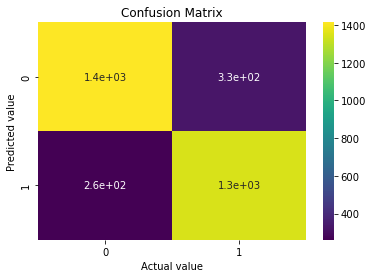

In [135]:
sns.heatmap(cm, annot = True, cmap = 'viridis')    # Plotting Heatmap
plt.title("Confusion Matrix")                   # Naming title of the plot
plt.ylabel("Predicted value")                # Labeling Y axis as "Predicted value"
plt.xlabel("Actual value")                 # Labeling X axis as "Actual value"
plt.show()

* <font size = "3">There are **two** kinds of values, which are :-</font>
    *  <font size = "3">**Positive** value</font>
    *  <font size = "3">**Negative** value</font>


* <font size = "3">In this case, **positive** value is **1** while **negative** value is **0**.</font>

* <font size = "3">There are **four** elements of <span style = "color : green">**Confusion Matrix**</span> :-</font>
    * <font size = "3"><span style = "color : blue">**TP**</span>(**True positive**) :- It means the **predicted** and **actual** values are **positive**. In this case, it can be said that the **actual** value is **1** and **model** has also **predicted** as **1**.</font>
    * <font size = "3"><span style = "color : blue">**TN**</span>(**True negative**) :- It means the **predicted** and **actual** values are **negative**. In this case, it can be said that the **actual** value is **0** and **model** has also **predicted** as **0**.</font>
    * <font size = "3"><span style = "color : blue">**FP**</span>(**False positive**) :- It means the **predicted** value is **positive** and **actual** value is **negative**. In this case, it can be said that the **actual** value is **0** and **model** has **predicted** as **1**.</font>
    * <font size = "3"><span style = "color : blue">**FN**</span>(**False negative**) :- It means the **predicted** value is **negative** and **actual** value is **positive**. In this case, it can be said that the **actual** value is **1** and **model** has **predicted** as **0**.</font>

* <font size = "3">All the above **four** elements are going to be **evaluated** in next step.</font>

In [136]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [137]:
TP    # calculating true positives

1346

* <font size = "3">Hence, the number of **clients** who have **subscribed** a term **deposit** and the **model** which **predicted** the same are **1346**. </font>

In [138]:
TN    # calculating true negatives

1414

* <font size = "3">Hence, the number of **clients** who do not have **subscribed** a term **deposit** and the **model** which **predicted** the same are **1414**. </font>

In [139]:
FP    # calculating false positives

328

* <font size = "3">Hence, the number of **clients** who do not have **subscribed** a term **deposit** but the **model** **predicted** that they have **subscribed** are **328**. </font>

In [140]:
FN    # calculating false negatives

261

* <font size = "3">Hence, the number of **clients** who have **subscribed** a term **deposit** but the **model** **predicted** that they haven't **subscribed** are **328**. </font>

## Analysis of Above Result

* <font size = "3">From the above, it is understandable that there are two types of wrong prediction :-</font>
    * <font size = "3">**False Positive**, means the **client** do **not subscribed** to term **deposit**, but the **model** thinks he did.</font>
    * <font size = "3">**False Negative**, means the **client** **subscribed** to term **deposit**, but the **model** said he dont.</font>

* <font size = "3">It is believed that,</font>
     * <font size = "3">The **first** one i.e. <span style = "color : purple">**False Positive**</span> is **most harmful**, because the **bank** think that they already have that **client** but they don't and maybe **bank** **lost** him in other **future campaings**.</font>
     * <font size = "3">The **second** one i.e. <span style = "color : purple">**False Negative**</span> is **not good** but it is **better** than the **first** one, **bank** have that **client** and in the future the **bank** will discover that in reality he is already the **bank's client**.</font>

* <font size = "3">Now, like <span style = "color : green">**Accuracy**</span> there are some more **parameters** which are used to **evaluate** the **performance** of **model**.</font>

## Sensitivity (Recall)

* <font size = "3">It is the **percentage** of **correct prediction** of **positive** value if **actual** output is **positive**.</font> 
* <font size = "3">In other words, it could be said that <span style = "color : green">**sensitivity**</span> is the **ratio** of **true positives**(<span style = "color : purple">**TP**</span>) with the **sum** of **true positives**(<span style = "color : purple">**TP**</span>) and **false negatives**(<span style = "color : purple">**FN**</span>).</font>

In [161]:
# Sensitivity of all models
print("Sensitivity of model 1:", metrics.recall_score(y_test, log_pred))
print("Sensitivity of model 2:", metrics.recall_score(y_test, dtree_pred))
print("Sensitivity of model 3:", metrics.recall_score(y_test, knn_pred))
print("Sensitivity of model 4:", metrics.recall_score(y_test, nb_pred))
print("Sensitivity of model 5:", metrics.recall_score(y_test, svc_pred))
print("Sensitivity of model 6:", metrics.recall_score(y_test, randforest_pred))
print("Sensitivity of model 7:", metrics.recall_score(y_test, gb_pred))
print("Sensitivity of model 8:", metrics.recall_score(y_test, xgb_pred))

Sensitivity of model 1: 0.7747355320472931
Sensitivity of model 2: 0.747355320472931
Sensitivity of model 3: 0.731176104542626
Sensitivity of model 4: 0.5731176104542626
Sensitivity of model 5: 0.7069072806471687
Sensitivity of model 6: 0.8332296204107031
Sensitivity of model 7: 0.8375855631611698
Sensitivity of model 8: 0.8462974486621033


* <font size = "3"><span style = "color : purple">**Sensitivity**</span> of **model 8** is **highest** which is **84.63%** and this **model** was **trained** under <span style = "color : green">**Extreme Gradient Boosting**</span>.</font>

* <font size = "3">It means that out of **100%** data which shows that **client** have **subscribed** term **deposit**, **84.63%** data has been **predicted** same by the <span style = "color : green">**Extreme Gradient Boosting**</span> **model**.</font>

## Precision

* <font size = "3">It is the **percentage** of **actual** output as **positive** value in the total **prediction** of **positive** value.</font> 
* <font size = "3">In other words, it could be said that <span style = "color : green">**precision**</span> is the **ratio** of **true positives**(<span style = "color : purple">**TP**</span>) with the **sum** of **true positives**(<span style = "color : purple">**TP**</span>) and **false positives**(<span style = "color : purple">**FP**</span>).</font>

In [162]:
# Precision of all models
print("Precision of model 1:", metrics.precision_score(y_test, log_pred))
print("Precision of model 2:", metrics.precision_score(y_test, dtree_pred))
print("Precision of model 3:", metrics.precision_score(y_test, knn_pred))
print("Precision of model 4:", metrics.precision_score(y_test, nb_pred))
print("Precision of model 5:", metrics.precision_score(y_test, svc_pred))
print("Precision of model 6:", metrics.precision_score(y_test, randforest_pred))
print("Precision of model 7:", metrics.precision_score(y_test, gb_pred))
print("Precision of model 8:", metrics.precision_score(y_test, xgb_pred))

Precision of model 1: 0.8068697342838627
Precision of model 2: 0.7567737870195337
Precision of model 3: 0.7659713168187744
Precision of model 4: 0.8071866783523225
Precision of model 5: 0.7498349834983499
Precision of model 6: 0.7984496124031008
Precision of model 7: 0.8040621266427718
Precision of model 8: 0.8061647895672792


* <font size = "3"><span style = "color : purple">**Precision**</span> of **model 4** is **highest** which is **80.72%** and this **model** was **trained** under <span style = "color : green">**Naive Bayes**</span>.</font>

* <font size = "3">It means that out of **100%** data which the <span style = "color : green">**Naive Bayes**</span> **model predicts** that **client subscribed** term **deposit**, **80.72%** data is showing **actually** that **client subscribed** term **deposit**.</font>

## Specificity

* <font size = "3">It is the **percentage** of **correct prediction** of **negative** value if **actual** output is **negative** value.</font> 
* <font size = "3">In other words, it could be said that <span style = "color : green">**specificity**</span> is the **ratio** of **true negatives**(<span style = "color : purple">**TN**</span>) with the **sum** of **true negatives**(<span style = "color : purple">**TN**</span>) and **false positives**(<span style = "color : purple">**FP**</span>).</font>

In [170]:
# Specificity of all models(TN / (TN + FP))
print("Specificity of model 1:", confusion_matrix(y_test, log_pred)[0,0] / 
                                     (confusion_matrix(y_test, log_pred)[0,0] + confusion_matrix(y_test, log_pred)[0,1]))
print("Specificity of model 2:", confusion_matrix(y_test, dtree_pred)[0,0] / 
                                     (confusion_matrix(y_test, dtree_pred)[0,0] + confusion_matrix(y_test, dtree_pred)[0,1]))
print("Specificity of model 3:", confusion_matrix(y_test, knn_pred)[0,0] / 
                                     (confusion_matrix(y_test, knn_pred)[0,0] + confusion_matrix(y_test, knn_pred)[0,1]))
print("Specificity of model 4:", confusion_matrix(y_test, nb_pred)[0,0] / 
                                     (confusion_matrix(y_test, nb_pred)[0,0] + confusion_matrix(y_test, nb_pred)[0,1]))
print("Specificity of model 5:", confusion_matrix(y_test, svc_pred)[0,0] / 
                                     (confusion_matrix(y_test, svc_pred)[0,0] + confusion_matrix(y_test, svc_pred)[0,1]))
print("Specificity of model 6:", confusion_matrix(y_test, randforest_pred)[0,0] / 
                                     (confusion_matrix(y_test, randforest_pred)[0,0] + confusion_matrix(y_test, randforest_pred)[0,1]))
print("Specificity of model 7:", confusion_matrix(y_test, gb_pred)[0,0] / 
                                     (confusion_matrix(y_test, gb_pred)[0,0] + confusion_matrix(y_test, gb_pred)[0,1]))
print("Specificity of model 8:", confusion_matrix(y_test, xgb_pred)[0,0] / 
                                     (confusion_matrix(y_test, xgb_pred)[0,0] + confusion_matrix(y_test, xgb_pred)[0,1]))

Specificity of model 1: 0.8289322617680827
Specificity of model 2: 0.7784156142365097
Specificity of model 3: 0.7939150401836969
Specificity of model 4: 0.8737083811710677
Specificity of model 5: 0.7824339839265212
Specificity of model 6: 0.8059701492537313
Specificity of model 7: 0.8117106773823192
Specificity of model 8: 0.812284730195178


* <font size = "3"><span style = "color : purple">**Specificity**</span> of **model 4** is **highest** which is **87.37%** and this **model** was **trained** under <span style = "color : green">**Naive Bayes**</span>.</font>

* <font size = "3">It means that out of **100%** data which shows that **client** do **not have subscribed** term **deposit**, **87.37%** data the **model** has **predicted** it same.</font>

## Plotting ROC Curve

* <font size = "3">An <span style = "color : green">**ROC curve**</span> demonstrates several things:</font>

- <font size = "3">It shows the **tradeoff** between <span style = "color : purple">**sensitivity**</span> and <span style = "color : purple">**specificity**</span> (any **increase** in <span style = "color : purple">**sensitivity**</span> will be accompanied by a **decrease** in <span style = "color : purple">**specificity**</span>).</font>
- <font size = "3">The **closer** the **curve** follows the **left-hand border** and then the **top border** of the <span style = "color : green">**ROC**</span> space, the **more accurate** the test.</font>
- <font size = "3">The **closer** the **curve** comes to the **45-degree diagonal** of the <span style = "color : green">**ROC**</span> space, the **less accurate** the test.</font>

* <font size = "3">In <span style = "color : green">**ROC curve**</span>, an important **parameter** is going to be **evaluated** i.e. <span style = "color : purple">**AUC**</span>(**Area under curve**).</font>
* <font size = "3">**More** the value of <span style = "color : purple">**AUC**</span>, **more accurate** is the test and vice-versa.</font>
* <font size = "3">The <span style = "color : green">**ROC curve**</span> is going to be **plotted** for all **models**.</font>

In [144]:
from sklearn import metrics            # Importing metrics

# Making function for plotting "ROC curve" which takes "algorithm" and "model" as parameters
def roc_curve(algorithm, model):
    y_pred_proba = model.predict_proba(X_test)[:,1]     # returns an array of lists containing the class probabilities for the input data points.
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)    # calculating "false-positive" rate, "true-positive" rate and "threshold"    
    auc = metrics.roc_auc_score(y_test, y_pred_proba)           # calculating auc(area under curve)

    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)         # plotting "ROC curve" having "True positive" rate v/s "False positive rate" 
    plt.plot([0, 1], [0, 1],'r--')                             # plotting 45-degree diagonal
    plt.title('Receiver Operating Characteristic ' + algorithm, fontsize=10)    # Setting title for the graph
    plt.ylabel('True Positive Rate', fontsize=20)        #  Naming Y-axis as "True Positive" rate
    plt.xlabel('False Positive Rate',fontsize=15)        #  Naming X-axis as "False Positive" rate
    plt.legend(loc = 'lower right', prop = {'size': 16})      
    plt.show()

* <font size = "3">Now, the above **function** will be called for **plotting** <span style = "color : green">**ROC curve**</span> for every **models**.</font>

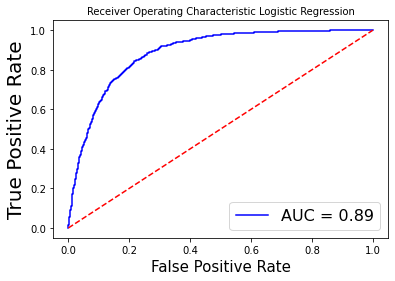

In [146]:
# ROC curve for "log_model"
roc_curve('Logistic Regression', log_model)

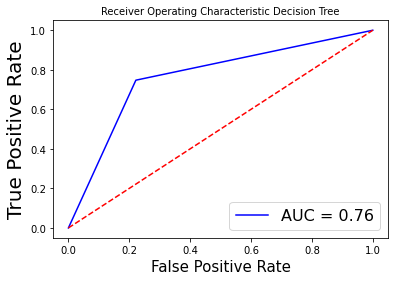

In [150]:
# ROC curve for "dtree_model"
roc_curve('Decision Tree', dtree_model)

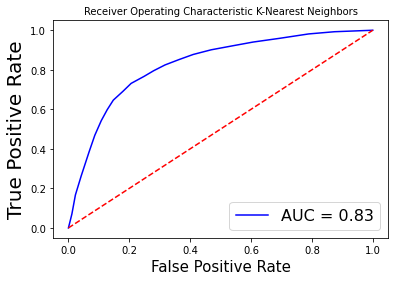

In [151]:
# ROC curve for "knn_model"
roc_curve('K-Nearest Neighbors', knn_model)

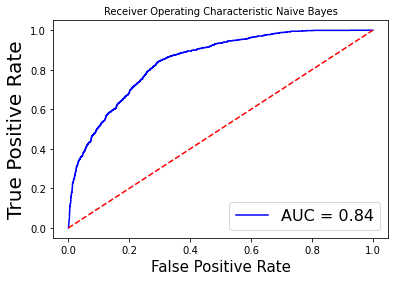

In [152]:
# ROC curve for "nb_model"
roc_curve('Naive Bayes', nb_model)

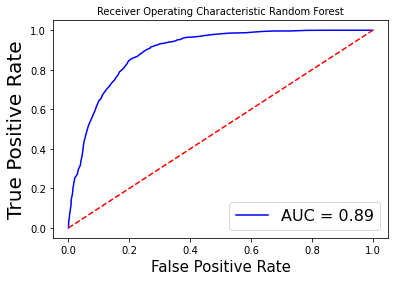

In [153]:
# ROC curve for "randforest_model"
roc_curve('Random Forest', randforest_model)

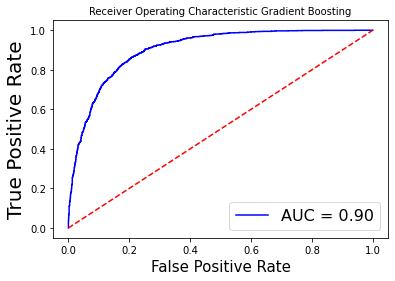

In [154]:
# ROC curve for "gb_model"
roc_curve('Gradient Boosting', gb_model)

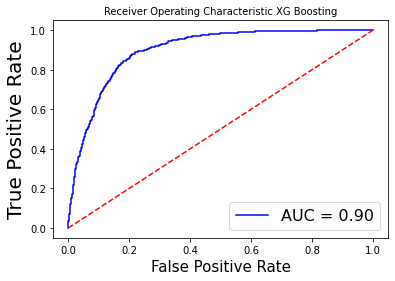

In [155]:
# ROC curve for "xgb_model"
roc_curve('XG Boosting', xgb_model)

* <font size = "3">The above **function** will not work for **plotting** <span style = "color : purple">**ROC curve**</span> of the **model** trained using <span style = "color : green">**Support Vector Machines**</span>. It is because <span style = "color : purple">**"pred_proba"**</span> **function** doesn't work for <span style = "color : green">**SVM**</span> as **probability** is not the **estimator** in <span style = "color : green">**SVM**</span>.</font>
* <font size = "3">Hence, the method of **plotting** <span style = "color : purple">**ROC curve**</span> for <span style = "color : green">**SVM**</span> is different which is **implemented** below.</font>

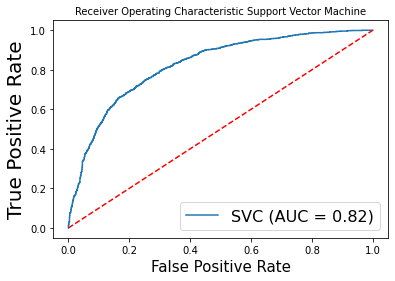

In [158]:
# ROC curve for "svc_model"
metrics.plot_roc_curve(svc_model, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Support Vector Machine', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop = {'size': 16})
plt.show()

* <font size = "3">From all the <span style = "color : purple">**ROCs**</span> **plotted** above, the **highest** <span style = "color : purple">**AUC**</span> is **0.90** (which is **brilliant**) and it has come for **two models** which are **trained** under <span style = "color : green">**Gradient Boosting**</span> and <span style = "color : green">**Extreme Gradient Boosting**</span>.</font> 
* <font size = "3">It means that these **two models** have performed the **best** at **distinguishing** between the **positive** and **negative** classes.</font>

## Classification Report

* <font size = "3">Apart from <span style = "color : green">**Confusion Matrix**</span>, <span style = "color : green">**Classification Report**</span> is also a **performance evaluation metrics**.</font>
* <font size = "3">It is used to show the <span style = "color : purple">**precision**</span>, <span style = "color : purple">**recall**</span>, <span style = "color : purple">**F1 Score**</span>, and <span style = "color : purple">**support**</span> of the **trained classification model**.</font>

* <font size = "3"><span style = "color : purple">**F1 Score**</span> is the **weighted harmonic mean** of <span style = "color : purple">**precision**</span> and <span style = "color : purple">**recall**</span>.</font>
* <font size = "3"><span style = "color : purple">**F1 Score**</span> tells about the **overall performance** of the **model**.</font>
* <font size = "3">The **closer** the value of the <span style = "color : purple">**F1 score**</span> is to **1.0**, the **better** the **expected performance** of the **model** is.</font>

* <font size = "3"><span style = "color : purple">**Support**</span> is the number of **actual occurrences** of the **class** in the dataset.</font>
* <font size = "3">It doesn’t vary between **models**, it just **diagnoses** the **performance evaluation process**.</font>

* <font size = "3">Here, the **models** for which <span style = "color : green">**classification report**</span> chart will be made are the ones who have given **best** <span style = "color : purple">**precision**</span> **scores** and <span style = "color : purple">**recall**</span> **scores**.</font>
* <font size = "3">The <span style = "color : green">**Extreme Gradient Boosting**</span> **model** gave the **best** <span style = "color : purple">**recall**</span> **score** and the <span style = "color : green">**Naive Bayes**</span> **model** gave the **best** <span style = "color : purple">**precision**</span> **score**.</font> 
* <font size = "3">Hence for these **two models**, <span style = "color : green">**Classification report**</span> chart will be made.</font>

In [171]:
# Displaying "classification report" chart for "xgb_model"
from sklearn.metrics import classification_report

print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1742
           1       0.81      0.85      0.83      1607

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [176]:
# Displaying "classification report" chart for "nb_model"
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1742
           1       0.81      0.57      0.67      1607

    accuracy                           0.73      3349
   macro avg       0.75      0.72      0.72      3349
weighted avg       0.75      0.73      0.72      3349



* <font size = "3">The <span style = "color : purple">**recall**</span> for **class 1** is **less** (**0.57**) in case of <span style = "color : green">**Naive Bayes**</span> **model**, because of which <span style = "color : purple">**F1 score**</span> is **below decent**(**0.67**) even though <span style = "color : purple">**precision**</span> is **very good**.</font>
* <font size = "3">Hence, others **models** should also be considered for making the <span style = "color : purple">**classification report**</span> chart.</font> 

In [177]:
# Displaying "classification report" chart for "log_model"
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1742
           1       0.81      0.77      0.79      1607

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [178]:
# Displaying "classification report" chart for "dtree_model"
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1742
           1       0.76      0.75      0.75      1607

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349



In [179]:
# Displaying "classification report" chart for "knn_model"
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1742
           1       0.77      0.73      0.75      1607

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349



In [180]:
# Displaying "classification report" chart for "svc_model"
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1742
           1       0.75      0.71      0.73      1607

    accuracy                           0.75      3349
   macro avg       0.75      0.74      0.75      3349
weighted avg       0.75      0.75      0.75      3349



In [181]:
# Displaying "classification report" chart for "randforest_model"
print(classification_report(y_test, randforest_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1742
           1       0.80      0.83      0.82      1607

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [182]:
# Displaying "classification report" chart for "gb_model"
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1742
           1       0.80      0.84      0.82      1607

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



* <font size = "3">From all the <span style = "color : purple">**classification reports**</span> above, it is clearly **visible** that <span style = "color : blue">**macro average**</span> and <span style = "color : blue">**weighted average**</span> of <span style = "color : purple">**F1 score**</span> is **highest** for <span style = "color : green">**Extreme Gradient Boosting**</span> **model** and i.e. **0.83**.</font>

# <span style = "color : blue">Conclusion</span>

* <font size = "3">Hence, the analysis for the metrics evaluation are such as:-</font>
     * <font size = "3"><span style = "color : purple">**Accuracy**</span> - <span style = "color : green">**Gradient Boosting**</span> model having **best accuracy**.</font>
     * <font size = "3"><span style = "color : purple">**Sensitivity**</span> - <span style = "color : green">**Extreme Gradient Boosting**</span> model having **best sensitivity**.</font>
     * <font size = "3"><span style = "color : purple">**Precision**</span> - <span style = "color : green">**Naive Bayes**</span> model having **best precision**.</font>
     * <font size = "3"><span style = "color : purple">**Specificity**</span> - <span style = "color : green">**Naive Bayes**</span> model having **best specificity**.</font>
     * <font size = "3"><span style = "color : purple">**AUC**</span> - <span style = "color : green">**Gradient Boosting**</span> model and <span style = "color : green">**Extreme Gradient Boosting**</span> model having **highest AUC**.</font>
     * <font size = "3"><span style = "color : purple">**F1 score**</span> - <span style = "color : green">**Extreme Gradient Boosting**</span> model having **best F1 score**.</font>
     
     
* <font size = "3">Hence, it can be said that **model** **trained** using <span style = "color : green">**Extreme Gradient Boosting**</span> algorithm is giving **best overall performance**.</font>
* <font size = "3">Therefore, <span style = "color : green">**Extreme Gradient Boosting Classifier**</span> is the **best** **model** for **predicting** whether the **client** will **subscribe** to a term **deposit** or not.</font>  